In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [451]:
np.random.seed(122)

As = []
bs = []
A = 0
b = 0
for i in range(3):
    A_ = np.random.normal(size=(2,2))
    As.append(A_.T@A_ + 0.1 * np.eye(2))
    
    r = np.random.normal(size=1)
    bs.append(np.array([r, r]))
    
    A += A_
    b += np.array([r, r])


sols = np.random.normal(size=(3,2))
avg_sol = np.array([np.mean(sols[:,0]), np.mean(sols[:,1])])

In [452]:
def f(x, y, A, sol):
    x = x.copy() - sol[0]
    y = y.copy() - sol[1]
    
    ret  = A[0,0] * x ** 2
    ret += A[1,1] * y ** 2
    ret += 2 * A[0,1] * x * y
    
    return ret

def sum_f(x, y, As, sols):
    ret = 0
    
    for i in range(sols.shape[0]):
        ret += f(x, y, As[i], sols[i])

    return ret / len(As)

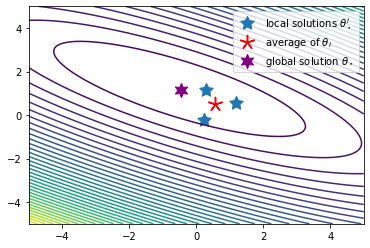

In [453]:
# Generating data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sum_f(X, Y, As, sols)
Z1 = f(X, Y, As[0], sols[0])
Z2 = f(X, Y, As[1], sols[1])
Z3 = f(X, Y, As[2], sols[2])


# Creating contour plot
plt.contour(X, Y, Z, levels=40)


true_sol = np.where(Z==np.min(Z))
true_sol = x[true_sol[1][0]], y[true_sol[0][0]]

plt.scatter(sols[:,0], sols[:,1], marker=(5, 1, 0), s=200)
plt.scatter([avg_sol[0]], [avg_sol[1]], marker=(5, 2, 0), color="red", s=200)
plt.scatter([true_sol[0]], [true_sol[1]], marker=(6, 1, 0), color="purple", s=200)

plt.legend(["local solutions $\\theta_\\star^i$", "average of $\\theta_i$", "global solution $\\theta_\\star$"])
plt.savefig("images/all-minimums-heterogeneous.pdf", bbox_inches=False)

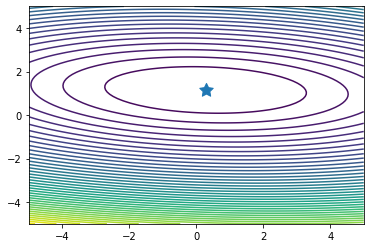

In [422]:
# Creating contour plot
plt.contour(X, Y, Z1, levels=40)
plt.scatter([sols[0,0]], [sols[0,1]], marker=(5, 1, 0), s=200)



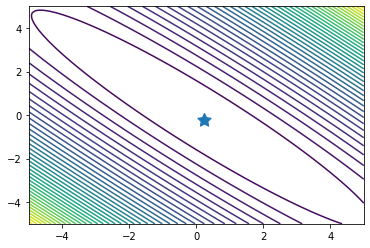

In [423]:

# Creating contour plot
plt.contour(X, Y, Z2, levels=40)
plt.scatter([sols[1,0]], [sols[1,1]], marker=(5, 1, 0), s=200)


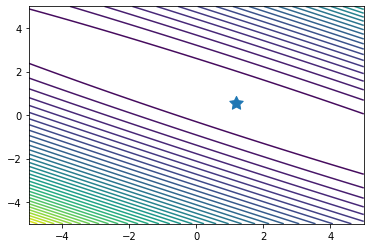

In [424]:

# Creating contour plot
plt.contour(X, Y, Z3, levels=40)
plt.scatter([sols[2,0]], [sols[2,1]], marker=(5, 1, 0), s=200)


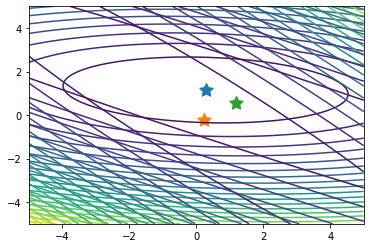

In [425]:
# Creating contour plot
plt.contour(X, Y, Z1, levels=20)
plt.scatter([sols[0,0]], [sols[0,1]], marker=(5, 1, 0), s=200)


# Creating contour plot
plt.contour(X, Y, Z2, levels=20)
plt.scatter([sols[1,0]], [sols[1,1]], marker=(5, 1, 0), s=200)

# Creating contour plot
plt.contour(X, Y, Z3, levels=20)
plt.scatter([sols[2,0]], [sols[2,1]], marker=(5, 1, 0), s=200)


In [426]:
As_hom = [As[0] for _ in range(len(As))]

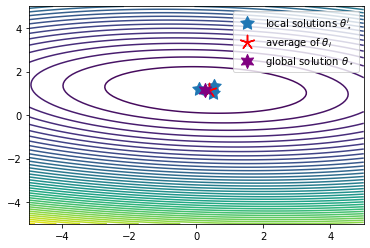

In [455]:
# Generating data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sum_f(X, Y, As_hom, np.array([sols[0] for _ in range(len(sols))]))
Z1 = f(X, Y, As_hom[0], sols[0])
Z2 = f(X, Y, As_hom[1], sols[0])
Z3 = f(X, Y, As_hom[2], sols[0])


# Creating contour plot
plt.contour(X, Y, Z, levels=40)


true_sol = np.where(Z==np.min(Z))
true_sol = x[true_sol[1][0]], y[true_sol[0][0]]

rng = np.random.default_rng(seed=12456)
sols_hom = np.array([sols[0] for _ in range(3)]) + rng.normal(scale=0.4, size=(3,2))
avg_hom = [np.mean(sols_hom[:,0]), np.mean(sols_hom[:,1])]

plt.scatter([sols_hom[:,0]], [sols_hom[:,1]], marker=(5, 1, 0), s=200)
plt.scatter([avg_hom[0]], [avg_hom[1]], marker=(5, 2, 0), color="red", s=200)
plt.scatter([true_sol[0]], [true_sol[1]], marker=(6, 1, 0), color="purple", s=200)

plt.legend(["local solutions $\\theta_\\star^i$", "average of $\\theta_i$", "global solution $\\theta_\\star$"])
plt.savefig("images/all-minimums-homogeneous.pdf", bbox_inches=False)